In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# This dataset contains information related to diabeties patients, aiming to predict the onset of diabetes based on various health metrics.
# Columns:
# 1. Pregnancies: Number of pregnancies the patient has had.
# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
# 3. BloodPressure: Diastolic blood pressure (mm Hg).
# 4. SkinThickness: Triceps skin fold thickness (mm).
# 5. Insulin: 2-Hour serum insulin (mu U/ml).
# 6. BMI: Body mass index (weight in kg/(height in m)^2).
# 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function that scores likelihood of diabetes based on family history).
# 8. Age: Age of the patient (years).
# 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic).

# This dataset is commonly used for binary classification tasks, where the goal is to predict whether a patient is diabetic or not.
# However, it's worth nothing that the dataset may have missing values or outliers, which might require preprocessing steps such as imputation or outlier detection.
# Additionally, feature scaling and normalization could be beneficial due to the varying scales of the features.
# Lastly, care should be taken to ensure fairness and mitigate biases, especially when deploying models trained on this dataset in real-world healthcare applications.


In [3]:
df=pd.read_csv("diabeties.csv") #pd for data analysis
df

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info() # In these data has  all are int and float type datatypes, there is no null values and no object type data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()
#bmi and skin are negatively skewed
#pregnent,glocose,bp,insulin,predigree,age,target are positively skewed

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


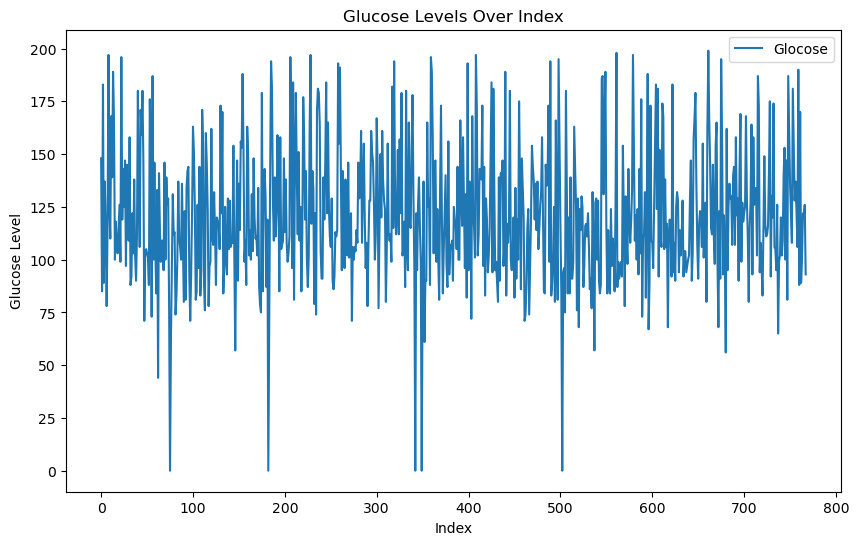

In [6]:
# Example: Plotting glucose levels over index (assuming it's time series or ordered data)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['glocose'], label='Glocose')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels Over Index')
plt.legend()
plt.show()

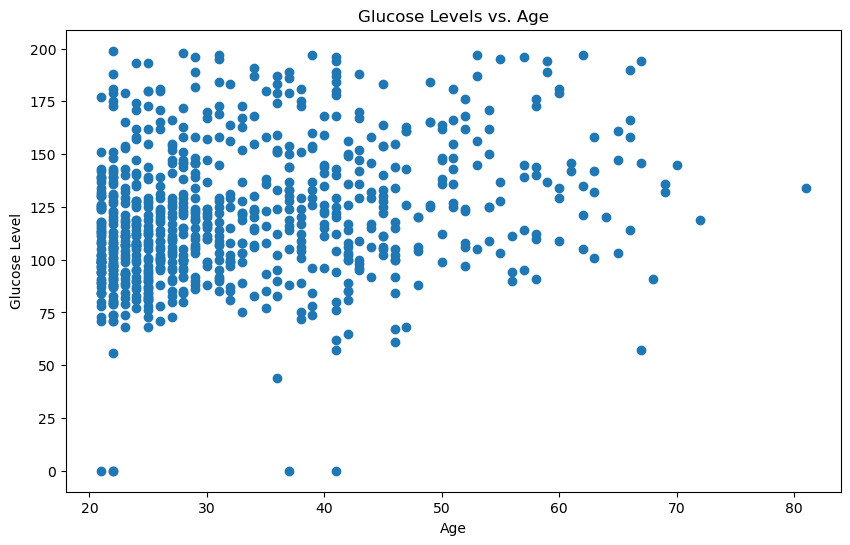

In [7]:
# Example: Scatter plot of glucose levels vs. age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['glocose'])
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels vs. Age')
plt.show()

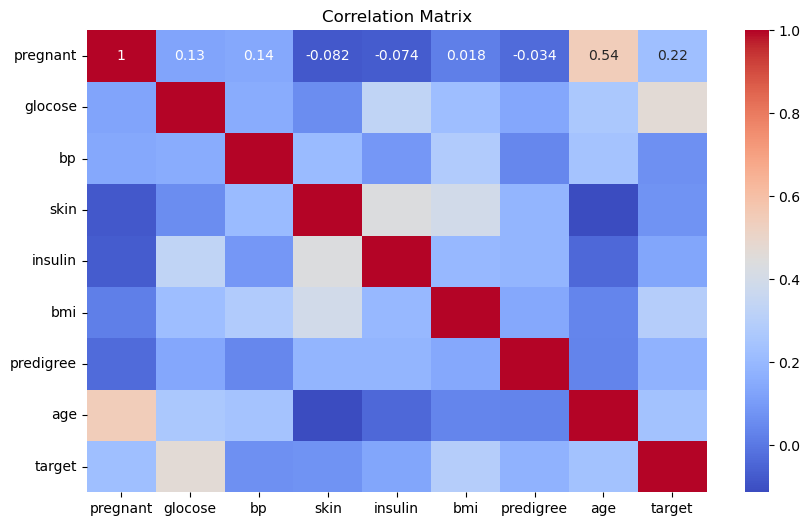

In [8]:
# Example: Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
features=df.iloc[:,:-2] #here we seperate feature columns are pregnant,glucose,bp,skin,bmi,pedigree
features

,pregnant,glocose,bp,skin,insulin,bmi,predigree
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


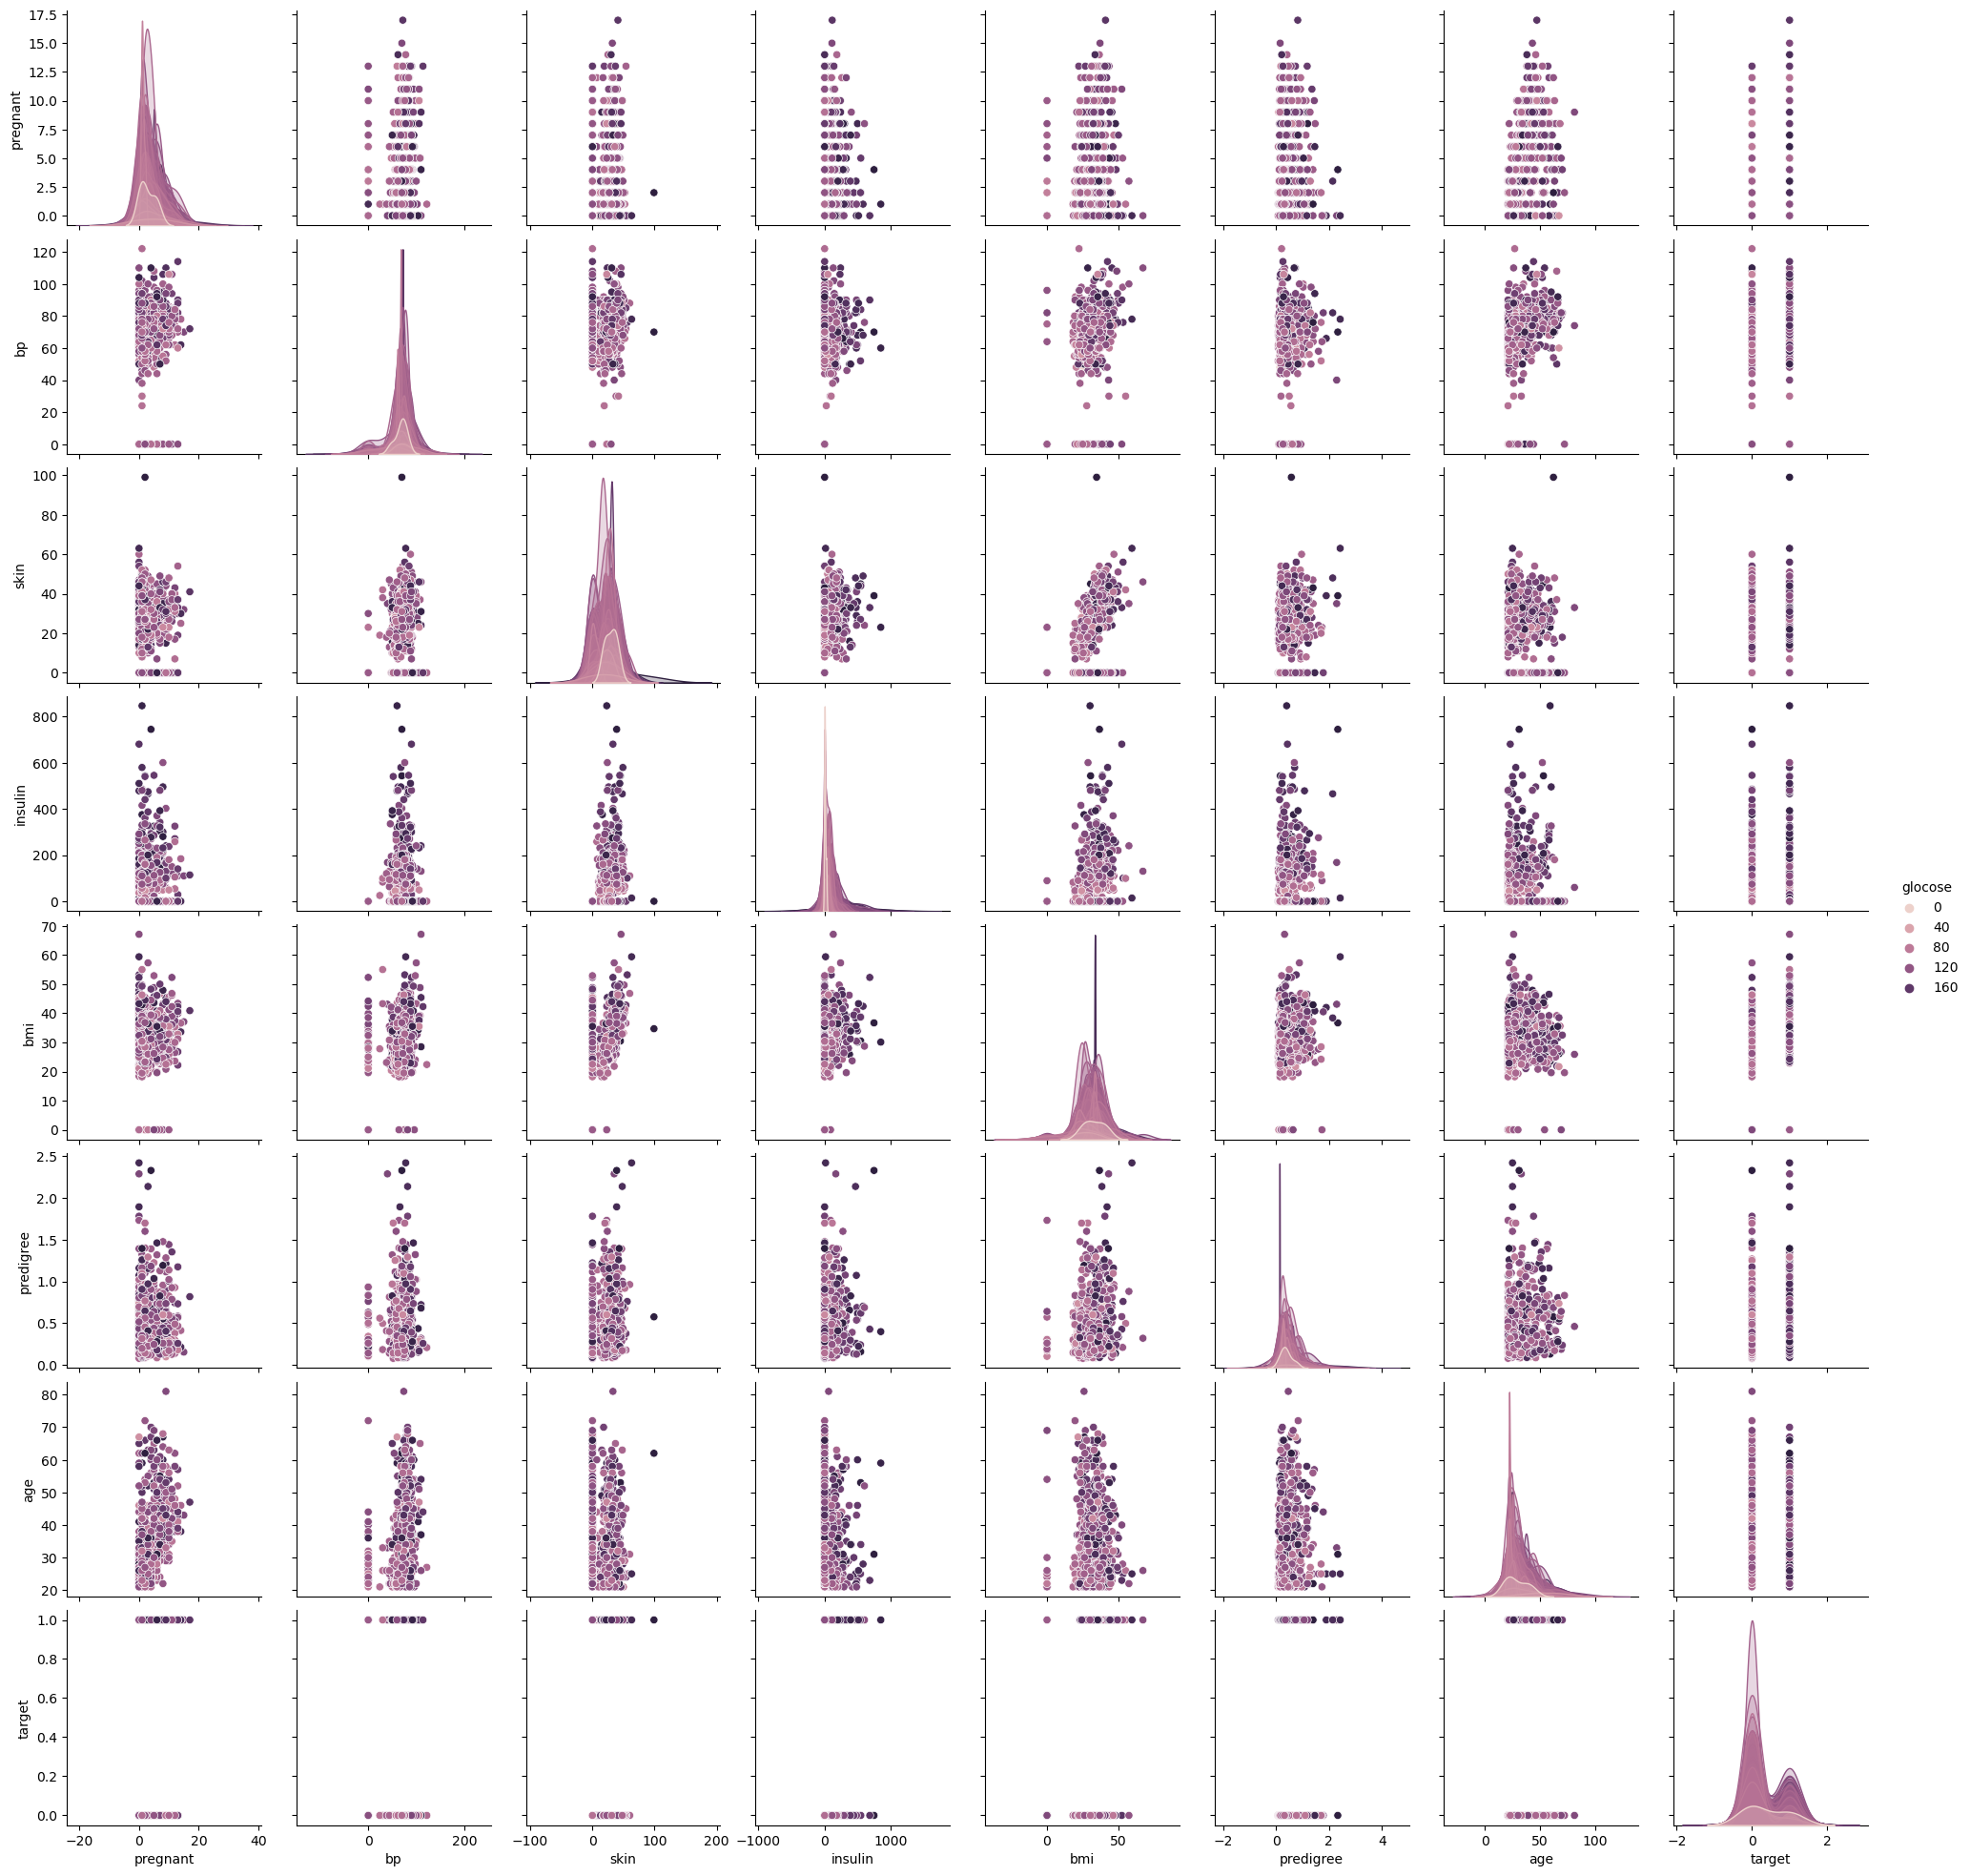

In [10]:
# Example: Pair plot for glocose
sns.pairplot(data=df,hue='glocose')
plt.show()

In [11]:
#here we seperate target column as target
target=df.iloc[:,-1]
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain_s=ss.fit_transform(xtrain)
xtest_s=ss.transform(xtest)


ss.fit(xtrain_s,ytrain)

 

StandardScaler()

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain_s,ytrain)
ypred=lr.predict(xtest_s)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
#In logestic regression our predicted accuracy is 0.78

Accuracy : 0.7792207792207793
[[89 10]
 [24 31]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [16]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain_s,ytrain)
ypred=svm.predict(xtest_s)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

#In SVC predicted accuracy is 0.78

Accuracy : 0.7792207792207793
[[89 10]
 [24 31]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=9,min_samples_leaf=15)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
#We use max_depth,min_samples so that there are no overfitting.
#Max_depth are pruning techinique

In [18]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
#The predicted accuracy in decission tree is 0.75

Accuracy : 0.7532467532467533
[[84 15]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
#The predicted accuracy in randomforestclassifier is 0.78

Accuracy : 0.7792207792207793
[[86 13]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



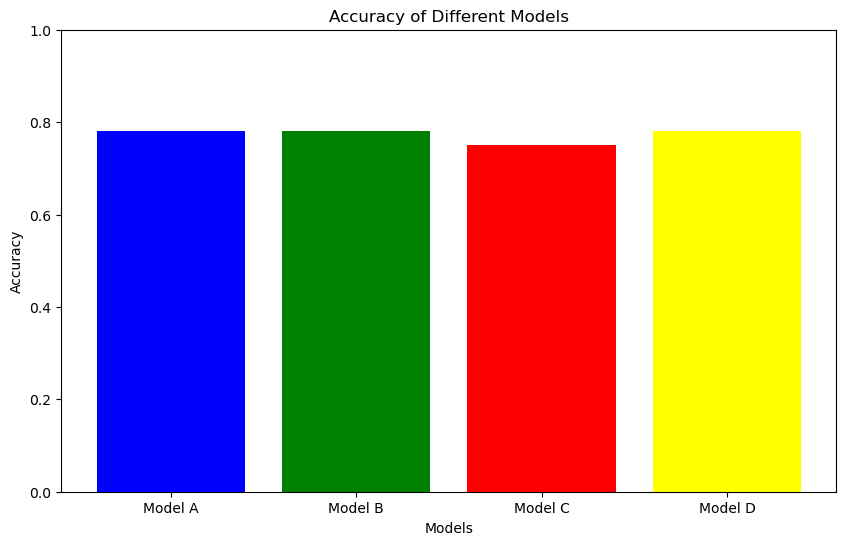

In [22]:
# Assume we have accuracies of different models
models = ['Model A', 'Model B', 'Model C','Model D']
accuracies = [0.78, 0.78,0.75, 0.78]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red','yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

#The accuracy in all models are same but slightly different Decision tree